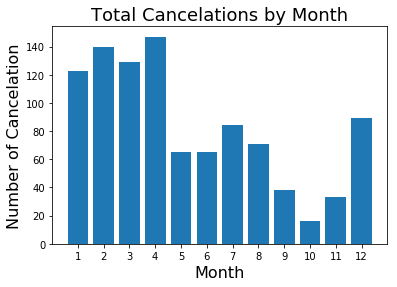

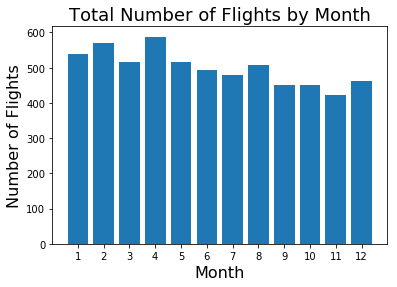

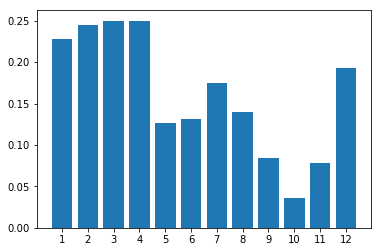

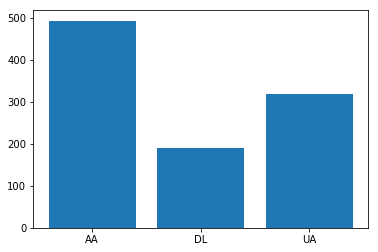

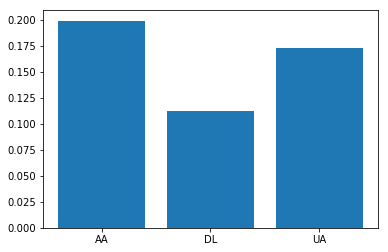

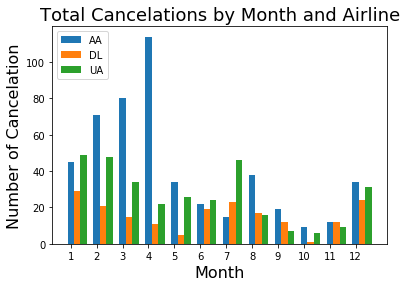

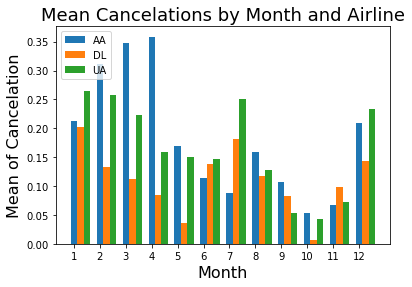

C:\Users\COHEAN\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\COHEAN\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


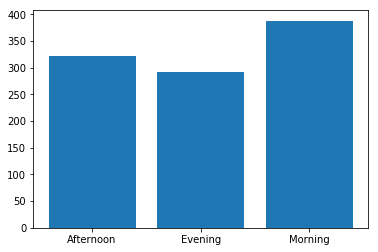

          Canceled        Month  SchedElapsedTime     ArrDelay     DepDelay  \
count  5999.000000  6000.000000       5998.000000  5999.000000  6000.000000   
mean      0.166694     6.220167        161.606869     8.108018     9.148833   
std       0.372734     3.436325         78.155044    35.764033    31.669299   
min       0.000000     1.000000       -127.000000   -72.000000   -16.000000   
25%       0.000000     3.000000        105.000000    -8.000000    -3.000000   
50%       0.000000     6.000000        145.000000     0.000000     0.000000   
75%       0.000000     9.000000        200.000000    10.000000     6.000000   
max       1.000000    12.000000        604.000000   410.000000   387.000000   

           Distance  
count   5999.000000  
mean     991.190698  
std      685.685410  
min     -439.000000  
25%      547.000000  
50%      837.000000  
75%     1249.000000  
max    15990.000000  
Month      1    2    3    4    5    6    7    8    9    10   11   12
Canceled             

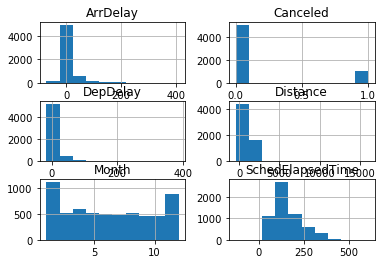

[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]
Optimization terminated successfully.
         Current function value: 0.402180
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Canceled   No. Observations:                 5995
Model:                          Logit   Df Residuals:                     5976
Method:                           MLE   Df Model:                           18
Date:                Mon, 13 Aug 2018   Pseudo R-squ.:                  0.1073
Time:                        18:10:16   Log-Likelihood:                -2411.1
converged:                       True   LL-Null:                       -2700.8
                                        LLR p-value:                1.800e-111
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------

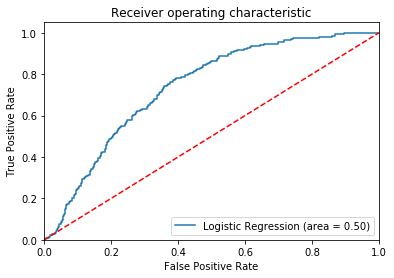

C:\Users\COHEAN\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [1]:
# -*- coding: utf-8 -*-
"""
@author: Andrew Cohen
"""

"""
Exploritory
"""

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

#read in the data
df = pd.read_csv('FlightDelays_Data_3.0.csv',header=0)

#Look at some plots
monthsum = (df.groupby(['Month'], as_index=False).sum())
y_pos = np.arange(len(monthsum.Month))
monthsum.Canceled
plt.bar(y_pos, monthsum.Canceled)
plt.xticks(y_pos, monthsum.Month)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Cancelation', fontsize=16)
plt.title('Total Cancelations by Month',fontsize=18)
plt.show()

#how balaned is the data?
monthcount = (df.groupby(['Month'], as_index=False).count())
y_pos = np.arange(len(monthcount.Month))
monthsum.Canceled
plt.bar(y_pos, monthcount.Canceled)
plt.xticks(y_pos, monthcount.Month)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Flights', fontsize=16)
plt.title('Total Number of Flights by Month',fontsize=18)
plt.show()

monthmean = (df.groupby(['Month'], as_index=False).mean())
y_pos = np.arange(len(monthmean.Month))

plt.bar(y_pos, monthmean.Canceled)
plt.xticks(y_pos, monthmean.Month)
plt.show()
#shapes match meaning its balanced

carriersum = (df.groupby(['UniqueCarrier'], as_index=False).sum())
y_pos = np.arange(len(carriersum.UniqueCarrier))
plt.bar(y_pos, carriersum.Canceled)
plt.xticks(y_pos, carriersum.UniqueCarrier)
plt.show()

carriermean = (df.groupby(['UniqueCarrier'], as_index=False).mean())
y_pos = np.arange(len(carriermean.UniqueCarrier))
plt.bar(y_pos, carriermean.Canceled)
plt.xticks(y_pos, carriermean.UniqueCarrier)
plt.show()

moncarsum = (df.groupby(['UniqueCarrier','Month'], as_index=False).sum())

AA = moncarsum.loc[moncarsum['UniqueCarrier'] == 'AA']
DL = moncarsum.loc[moncarsum['UniqueCarrier'] == 'DL']
UA = moncarsum.loc[moncarsum['UniqueCarrier'] == 'UA']
Airline = moncarsum.drop_duplicates(['UniqueCarrier']).UniqueCarrier

y_pos = np.arange(len(AA.Month))
bar_width = 0.25

plt.bar(y_pos, AA.Canceled, bar_width)
plt.bar(y_pos+bar_width, DL.Canceled, bar_width)
plt.bar(y_pos+bar_width+bar_width, UA.Canceled, bar_width)
plt.xticks(y_pos, AA.Month)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Cancelation', fontsize=16)
plt.title('Total Cancelations by Month and Airline',fontsize=18)
plt.legend(Airline,loc=2)
plt.show()



moncarmean = (df.groupby(['UniqueCarrier','Month'], as_index=False).mean())

AA = moncarmean.loc[moncarmean['UniqueCarrier'] == 'AA']
DL = moncarmean.loc[moncarmean['UniqueCarrier'] == 'DL']
UA = moncarmean.loc[moncarmean['UniqueCarrier'] == 'UA']
Airline = moncarmean.drop_duplicates(['UniqueCarrier']).UniqueCarrier

y_pos = np.arange(len(AA.Month))
bar_width = 0.25

plt.bar(y_pos, AA.Canceled, bar_width)
plt.bar(y_pos+bar_width, DL.Canceled, bar_width)
plt.bar(y_pos+bar_width+bar_width, UA.Canceled, bar_width)
plt.xticks(y_pos, AA.Month)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Mean of Cancelation', fontsize=16)
plt.title('Mean Cancelations by Month and Airline',fontsize=18)
plt.legend(Airline,loc=2)
plt.show()


"""
Modeling
"""

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import pylab as pl
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm

#Read in data
df = pd.read_csv('FlightDelays_Data_3.0.csv',header=0)

#time formatting
df['DepartureTime']=df['DepartureTime'].apply(lambda x: '{0:0>4}'.format(x))

df2 = df.assign(DepartureTimeForm=pd.to_datetime(df.DepartureTime, format='%H%M').dt.time)

#get seconds after midnight for a continuous time variable
df2['HrSeconds'] = df2['DepartureTime'].astype(str).str[:2]
df2['HrSecondsNum'] = pd.to_numeric(df2['HrSeconds'])
df2['HourSeconds'] = df2['HrSecondsNum'].apply(lambda x: x*3600)
df2['MinSeconds'] = df2['DepartureTime'].astype(str).str[2:]
df2['MinSecondsNum'] = pd.to_numeric(df2['MinSeconds'])
df2['MinuteSeconds'] = df2['MinSecondsNum'].apply(lambda x: x*60)
df2['FinalSec'] = df2['MinuteSeconds'] + df2['HourSeconds']

#Create a categorical time variable
def set_time(row):
    if row['FinalSec'] < 43200:
        return 'Morning'
    elif row['FinalSec'] >= 43200 and row['FinalSec'] < 61200:
        return "Afternoon"
    else:
        return "Evening"
    
df3 = df2.assign(TimeOfDay=df2.apply(set_time, axis=1))

TimeOfDaySum = (df3.groupby(['TimeOfDay'], as_index=False).sum())
y_pos = np.arange(len(TimeOfDaySum.TimeOfDay))
plt.bar(y_pos, TimeOfDaySum.Canceled)
plt.xticks(y_pos, TimeOfDaySum.TimeOfDay)
plt.show()

#Descriptive stats
print (df.describe())

print (pd.crosstab(df['Canceled'], df['Month'], rownames=['Canceled']))

df.hist()
pl.show()

#Drop the missing value
dfNoNA = df3.dropna()

#check correlation matrix
dfNoNA.corr()

#Create Dummies for Month and UniqueCarrier
dfcont = dfNoNA[['SchedElapsedTime','ArrDelay','DepDelay','Distance']]

dummy_ranksM = pd.get_dummies(dfNoNA['Month'], prefix='Month')
dummy_ranksUC = pd.get_dummies(dfNoNA['UniqueCarrier'], prefix='UniqueCarrier')
dummy_ranksTD = pd.get_dummies(dfNoNA['TimeOfDay'], prefix='TimeOfDay')

AllContX = dfcont.join(dummy_ranksM.drop(['Month_1'], axis = 1)).join(dummy_ranksUC.drop(['UniqueCarrier_AA'], axis = 1)).join(dummy_ranksTD.drop(['TimeOfDay_Morning'], axis = 1))

X = AllContX
y = dfNoNA['Canceled']

#Very quick variable selection
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(X, y )
print(rfe.support_)
print(rfe.ranking_)

#Run model
logit_model = sm.Logit(y, X)
result=logit_model.fit()
print(result.summary())

#Drop distance form model
X = AllContX.drop(['Distance'], axis = 1)
y = dfNoNA['Canceled']

logit_model = sm.Logit(y, X)
result=logit_model.fit()
print(result.summary())

#See how well the model performs by building a training and test set
X = AllContX.drop(['Distance'], axis = 1)
y = dfNoNA['Canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8122018)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#The data is very zero inflated. Adjusting the classification cutoff is a good, quick way to adjust for that, although overfitting is a possibility
#Made the cutoff low so that we can increase the recall of our model 
y_pred = pd.DataFrame((logreg.predict_proba(X_test)[:,1] >= 0.1).astype(int))

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

#The classification was adjusted for good recall for predicting cancelations 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#Use model parameters to predict cancelation probability for new set of factors
#Sorry did not have time to write a function for this part
Xnew = [248,37,54,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]
ynew = logreg.predict_proba(Xnew)